# 다중커널에서, Python Kernel Version 확인
> * 모듈을 활용한 파이썬 커널 버젼 확인하기
> * __import platform__
> * platform.python_version()
> 

> * __import sys__
> * sys.version   -- string

<img src=attachment:throw_up.jpg width=160 align=left>
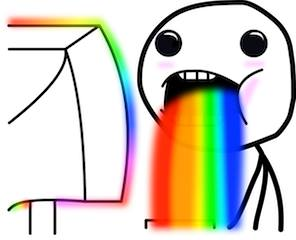

# 화일 버전확인 using import platform, sys
> * platform.python_version()
> * sys.version

In [1]:
import platform
platform.python_version()

'3.6.5'

In [2]:
import sys
sys.version

'3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]'

# 화일 위치확인 (__file__)
> * 네임스페이스 상에 기록된 자신의 위치 확인
> * 

In [3]:
import os

if not 'current_dir' in list(globals().keys()):
    current_dir = os.getcwd()

print("NOW POSITION :", current_dir)    

NOW POSITION : C:\Users\nitt0\Documents\Github\r_studio_ADsP_lectures\kaggle_examples


In [4]:
# '루트'와 '작업'디렉토리 설정 - for 스크립트런
DIRS = current_dir.partition("r_studio_ADsP_lectures")
ROOT = DIRS[0] + DIRS[1]
sys.path.append(ROOT)

WORK_DIR = os.path.join(ROOT, "_static", "_made_static", "")

os.listdir(WORK_DIR)

['bostonc_txt_new.csv', 'boston_corrected.txt']

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_bostonc = pd.read_csv(WORK_DIR + 'bostonc_txt_new.csv')
df_bostonc.head(5)

,Unnamed: 0,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,...,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,...,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,3,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,...,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,4,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,...,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,5,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,...,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


(array([ 15.,  39.,  97., 137.,  51.,  35.,  26.,   7.,  83.,  16.]),
 array([ 7. , 11.3, 15.6, 19.9, 24.2, 28.5, 32.8, 37.1, 41.4, 45.7, 50. ]),
 <a list of 10 Patch objects>)

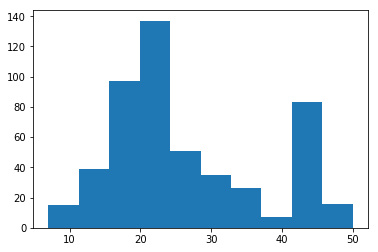

In [6]:
plt.hist(df_bostonc['CMEDV'])

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


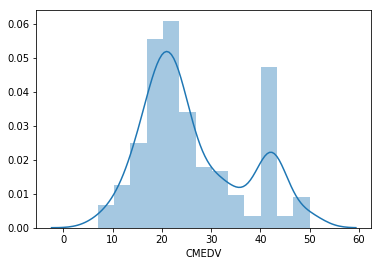

In [7]:
sns.distplot(df_bostonc['CMEDV'])

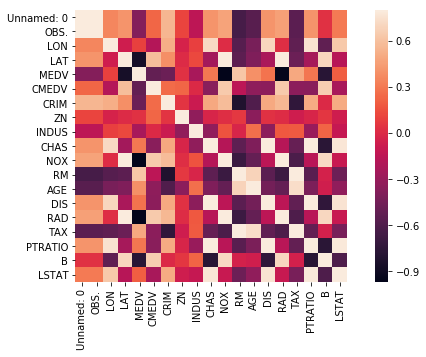

In [8]:
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df_bostonc.corr(), vmax=.8, square=True)

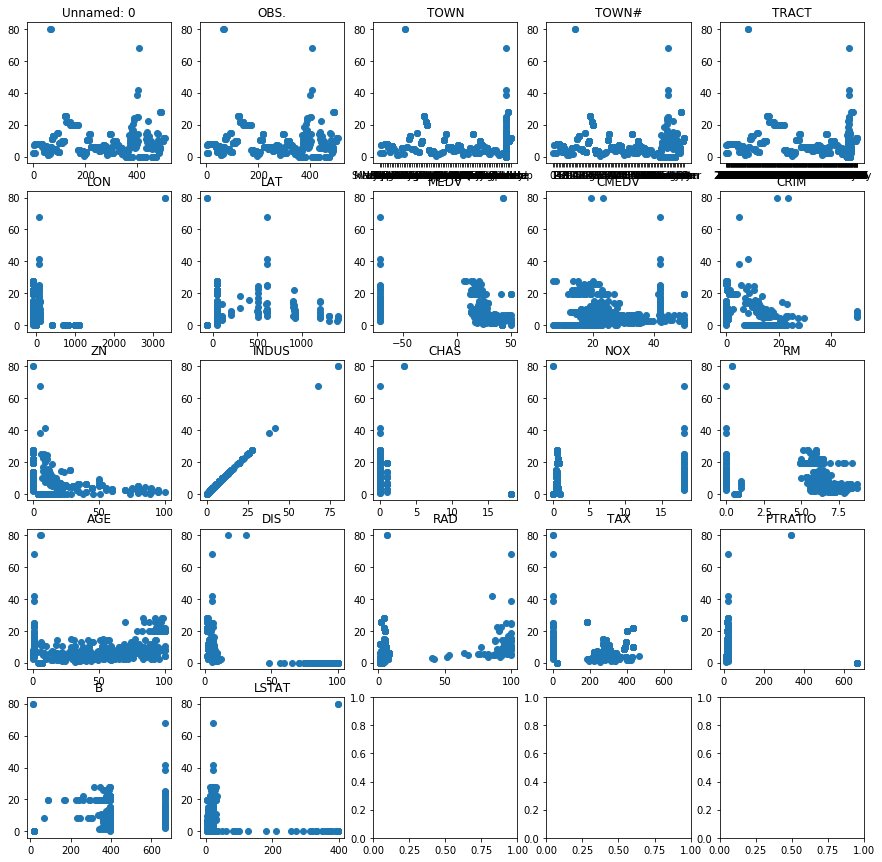

In [9]:
fig, axes = plt.subplots(5, 5, figsize=(15, 15))
y_axis = 'INDUS'

for col, a in zip(df_bostonc.columns, axes.flatten()):
    if col == y_axis:   
        a.set_title(col)
        a.scatter(df[y_axis], df[y_axis])
    else:
        df = df_bostonc[[y_axis, col]].dropna()
        a.set_title(col)
        a.scatter(df[col], df[y_axis])

In [10]:
df_bostonc.columns[0]

'Unnamed: 0'

TypeError: unsupported operand type(s) for /: 'str' and 'int'

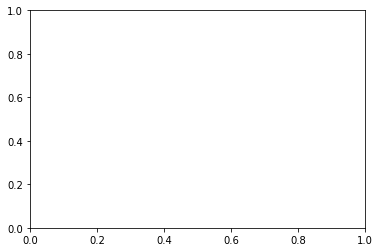

In [12]:
for n in range(2,5,1):
    column = df_bostonc.columns[n]
    sns.distplot(df_bostonc[column])

In [ ]:
fig = plt.figure(figsize=(13, 6))

for n in range(21):
    
    # 폭에 맞추어서, [2,5]열로 배치 한다
    fig.add_subplot(5, 5, n+1)
    
    plt.title(df_bostonc.columns[n+1])
    sns.distplot(df_bostonc[df_bostonc.columns[n+1]])
    
plt.show()    # 배치가 다 끝났으면, 보여준다.